This notebook shows effects of large-scale error on the radio-to-optical offset.

In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [2]:
comsou = Table.read("../data/common-source-position-wrt-gaia.fits")

# 1. On the R.A. and decl.

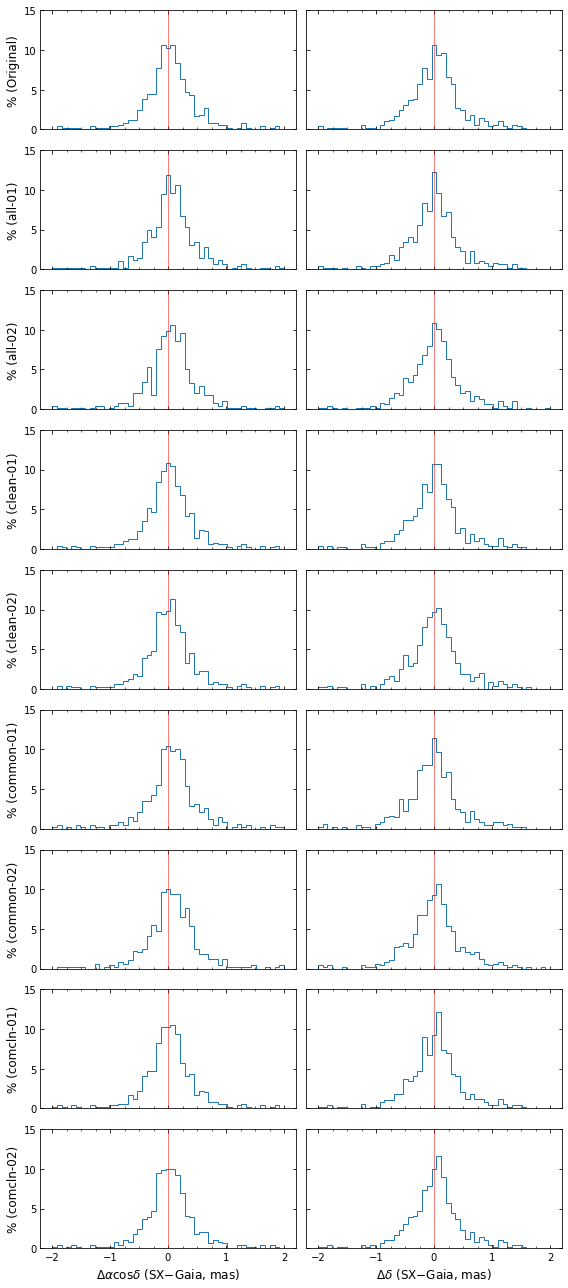

In [3]:
# Histogram of dra and ddec
fig, ((ax0, ax1),
      (ax2, ax3), (ax4, ax5),
      (ax6, ax7), (ax8, ax9),
      (ax10, ax11), (ax12, ax13),
      (ax14, ax15), (ax16, ax17)) = plt.subplots(
    figsize=(8, 18), ncols=2, nrows=9, sharex=True, sharey=True)

# n_bins = 25
bins_set = np.linspace(-2, 2, 50)

# Weights to calculate the per cent
wgt = 100 / len(comsou) * np.ones_like(comsou["ra"])

# Plot
# R.A. difference
# SX - Gaia
ax0.hist(comsou["dra_sx"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh01, all sources)
ax2.hist(comsou["dra_sx_all1"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh02, all sources)
ax4.hist(comsou["dra_sx_all2"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh01, clean sources)
ax6.hist(comsou["dra_sx_cln1"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh02, clean sources)
ax8.hist(comsou["dra_sx_cln2"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh01, common sources)
ax10.hist(comsou["dra_sx_com1"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh02, common sources)
ax12.hist(comsou["dra_sx_com2"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh01, common clean sources)
ax14.hist(comsou["dra_sx_ccl1"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh02, common clean sources)
ax16.hist(comsou["dra_sx_ccl2"], bins_set, histtype="step", fill=False, weights=wgt)

# Decl. difference
# SX - Gaia
ax1.hist(comsou["ddec_sx"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh01, all sources)
ax3.hist(comsou["ddec_sx_all1"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh02, all sources)
ax5.hist(comsou["ddec_sx_all2"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh01, clean sources)
ax7.hist(comsou["ddec_sx_cln1"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh02, clean sources)
ax9.hist(comsou["ddec_sx_cln2"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh01, common sources)
ax11.hist(comsou["ddec_sx_com1"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh02, common sources)
ax13.hist(comsou["ddec_sx_com2"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh01, clean sources)
ax15.hist(comsou["ddec_sx_ccl1"], bins_set, histtype="step", fill=False, weights=wgt)

# SX - Gaia (adjusted by vsh02, clean sources)
ax17.hist(comsou["ddec_sx_ccl2"], bins_set, histtype="step", fill=False, weights=wgt)

ymin, ymax = 0, 15
ax0.set_ylim([ymin, ymax])
# Vetical lines
ax0.vlines(0, ymin, ymax, "r", lw=0.5)
ax1.vlines(0, ymin, ymax, "r", lw=0.5)
ax2.vlines(0, ymin, ymax, "r", lw=0.5)
ax3.vlines(0, ymin, ymax, "r", lw=0.5)
ax4.vlines(0, ymin, ymax, "r", lw=0.5)
ax5.vlines(0, ymin, ymax, "r", lw=0.5)
ax6.vlines(0, ymin, ymax, "r", lw=0.5)
ax7.vlines(0, ymin, ymax, "r", lw=0.5)
ax8.vlines(0, ymin, ymax, "r", lw=0.5)
ax9.vlines(0, ymin, ymax, "r", lw=0.5)
ax10.vlines(0, ymin, ymax, "r", lw=0.5)
ax11.vlines(0, ymin, ymax, "r", lw=0.5)
ax12.vlines(0, ymin, ymax, "r", lw=0.5)
ax13.vlines(0, ymin, ymax, "r", lw=0.5)
ax14.vlines(0, ymin, ymax, "r", lw=0.5)
ax15.vlines(0, ymin, ymax, "r", lw=0.5)
ax16.vlines(0, ymin, ymax, "r", lw=0.5)
ax17.vlines(0, ymin, ymax, "r", lw=0.5)

ax0.set_ylabel("% (Original)", fontsize=12)
ax2.set_ylabel("% (all-01)", fontsize=12)
ax4.set_ylabel("% (all-02)", fontsize=12)
ax6.set_ylabel("% (clean-01)", fontsize=12)
ax8.set_ylabel("% (clean-02)", fontsize=12)
ax10.set_ylabel("% (common-01)", fontsize=12)
ax12.set_ylabel("% (common-02)", fontsize=12)
ax14.set_ylabel("% (comcln-01)", fontsize=12)
ax16.set_ylabel("% (comcln-02)", fontsize=12)

ax16.set_xlabel("$\Delta\\alpha\cos\delta$ (SX$-$Gaia, mas)", fontsize=12)
ax16.xaxis.set_minor_locator(MultipleLocator(0.2))

ax17.xaxis.set_minor_locator(MultipleLocator(0.25))
ax17.set_xlabel("$\Delta\delta$ (SX$-$Gaia, mas)", fontsize=12)

plt.tight_layout()

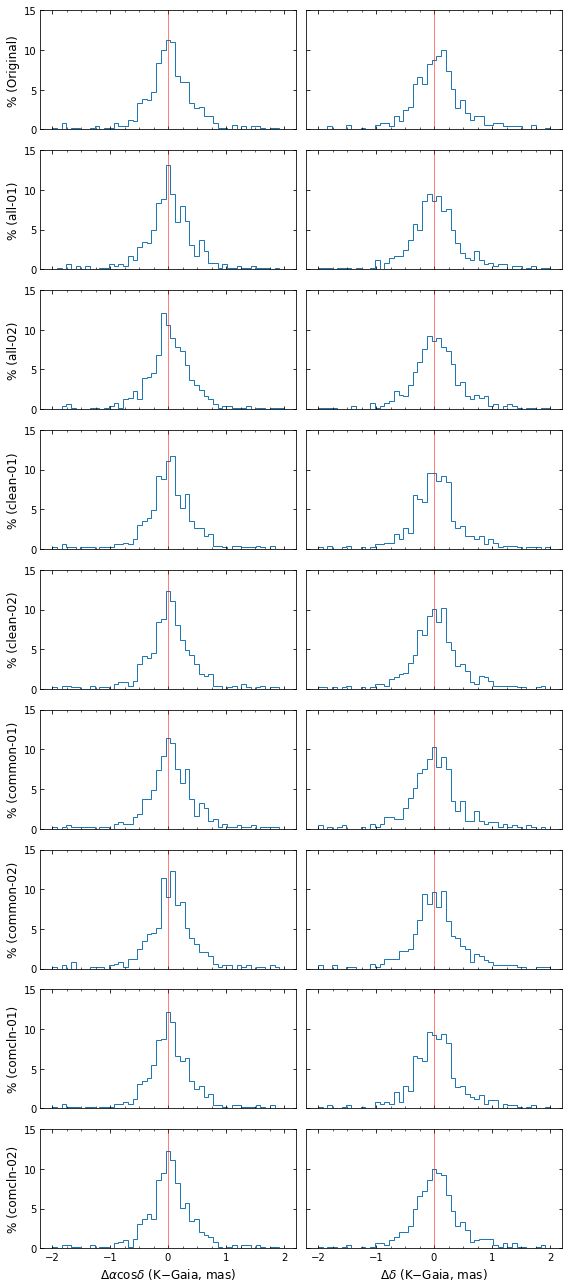

In [4]:
# Histogram of dra and ddec
fig, ((ax0, ax1),
      (ax2, ax3), (ax4, ax5),
      (ax6, ax7), (ax8, ax9),
      (ax10, ax11), (ax12, ax13),
      (ax14, ax15), (ax16, ax17)) = plt.subplots(
    figsize=(8, 18), ncols=2, nrows=9, sharex=True, sharey=True)

# n_bins = 25
bins_set = np.linspace(-2, 2, 50)

# Weights to calculate the per cent
wgt = 100 / len(comsou) * np.ones_like(comsou["ra"])

# Plot
# R.A. difference
# K - Gaia
ax0.hist(comsou["dra_k"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh01, all sources)
ax2.hist(comsou["dra_k_all1"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh02, all sources)
ax4.hist(comsou["dra_k_all2"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh01, clean sources)
ax6.hist(comsou["dra_k_cln1"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh02, clean sources)
ax8.hist(comsou["dra_k_cln2"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh01, common sources)
ax10.hist(comsou["dra_k_com1"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh02, common sources)
ax12.hist(comsou["dra_k_com2"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh01, common clean sources)
ax14.hist(comsou["dra_k_ccl1"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh02, common clean sources)
ax16.hist(comsou["dra_k_ccl2"], bins_set, histtype="step", fill=False, weights=wgt)

# Decl. difference
# K - Gaia
ax1.hist(comsou["ddec_k"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh01, all sources)
ax3.hist(comsou["ddec_k_all1"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh02, all sources)
ax5.hist(comsou["ddec_k_all2"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh01, clean sources)
ax7.hist(comsou["ddec_k_cln1"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh02, clean sources)
ax9.hist(comsou["ddec_k_cln2"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh01, common sources)
ax11.hist(comsou["ddec_k_com1"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh02, common sources)
ax13.hist(comsou["ddec_k_com2"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh01, clean sources)
ax15.hist(comsou["ddec_k_ccl1"], bins_set, histtype="step", fill=False, weights=wgt)

# K - Gaia (adjusted by vsh02, clean sources)
ax17.hist(comsou["ddec_k_ccl2"], bins_set, histtype="step", fill=False, weights=wgt)

ymin, ymax = 0, 15
ax0.set_ylim([ymin, ymax])
# Vetical lines
ax0.vlines(0, ymin, ymax, "r", lw=0.5)
ax1.vlines(0, ymin, ymax, "r", lw=0.5)
ax2.vlines(0, ymin, ymax, "r", lw=0.5)
ax3.vlines(0, ymin, ymax, "r", lw=0.5)
ax4.vlines(0, ymin, ymax, "r", lw=0.5)
ax5.vlines(0, ymin, ymax, "r", lw=0.5)
ax6.vlines(0, ymin, ymax, "r", lw=0.5)
ax7.vlines(0, ymin, ymax, "r", lw=0.5)
ax8.vlines(0, ymin, ymax, "r", lw=0.5)
ax9.vlines(0, ymin, ymax, "r", lw=0.5)
ax10.vlines(0, ymin, ymax, "r", lw=0.5)
ax11.vlines(0, ymin, ymax, "r", lw=0.5)
ax12.vlines(0, ymin, ymax, "r", lw=0.5)
ax13.vlines(0, ymin, ymax, "r", lw=0.5)
ax14.vlines(0, ymin, ymax, "r", lw=0.5)
ax15.vlines(0, ymin, ymax, "r", lw=0.5)
ax16.vlines(0, ymin, ymax, "r", lw=0.5)
ax17.vlines(0, ymin, ymax, "r", lw=0.5)

ax0.set_ylabel("% (Original)", fontsize=12)
ax2.set_ylabel("% (all-01)", fontsize=12)
ax4.set_ylabel("% (all-02)", fontsize=12)
ax6.set_ylabel("% (clean-01)", fontsize=12)
ax8.set_ylabel("% (clean-02)", fontsize=12)
ax10.set_ylabel("% (common-01)", fontsize=12)
ax12.set_ylabel("% (common-02)", fontsize=12)
ax14.set_ylabel("% (comcln-01)", fontsize=12)
ax16.set_ylabel("% (comcln-02)", fontsize=12)

ax16.set_xlabel("$\Delta\\alpha\cos\delta$ (K$-$Gaia, mas)", fontsize=12)
ax16.xaxis.set_minor_locator(MultipleLocator(0.2))

ax17.xaxis.set_minor_locator(MultipleLocator(0.25))
ax17.set_xlabel("$\Delta\delta$ (K$-$Gaia, mas)", fontsize=12)

plt.tight_layout()

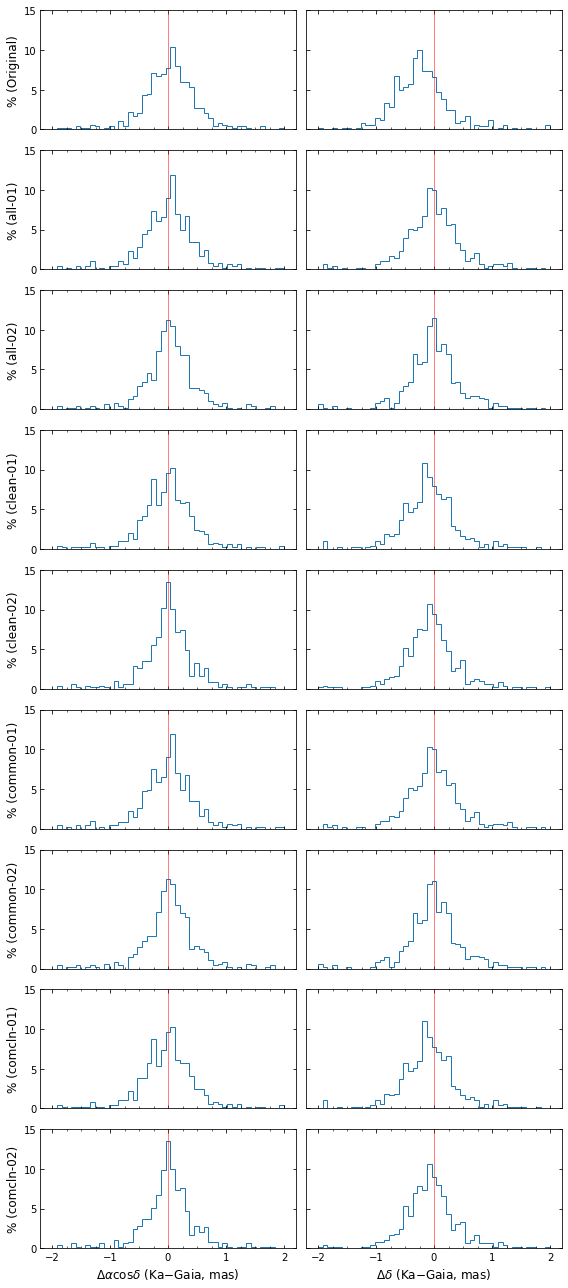

In [5]:
# Histogram of dra and ddec
fig, ((ax0, ax1),
      (ax2, ax3), (ax4, ax5),
      (ax6, ax7), (ax8, ax9),
      (ax10, ax11), (ax12, ax13),
      (ax14, ax15), (ax16, ax17)) = plt.subplots(
    figsize=(8, 18), ncols=2, nrows=9, sharex=True, sharey=True)

# n_bins = 25
bins_set = np.linspace(-2, 2, 50)

# Weights to calculate the per cent
wgt = 100 / len(comsou) * np.ones_like(comsou["ra"])

# Plot
# R.A. difference
# Ka - Gaia
ax0.hist(comsou["dra_ka"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh01, all sources)
ax2.hist(comsou["dra_ka_all1"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh02, all sources)
ax4.hist(comsou["dra_ka_all2"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh01, clean sources)
ax6.hist(comsou["dra_ka_cln1"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh02, clean sources)
ax8.hist(comsou["dra_ka_cln2"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh01, common sources)
ax10.hist(comsou["dra_ka_com1"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh02, common sources)
ax12.hist(comsou["dra_ka_com2"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh01, common clean sources)
ax14.hist(comsou["dra_ka_ccl1"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh02, common clean sources)
ax16.hist(comsou["dra_ka_ccl2"], bins_set, histtype="step", fill=False, weights=wgt)

# Decl. difference
# Ka - Gaia
ax1.hist(comsou["ddec_ka"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh01, all sources)
ax3.hist(comsou["ddec_ka_all1"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh02, all sources)
ax5.hist(comsou["ddec_ka_all2"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh01, clean sources)
ax7.hist(comsou["ddec_ka_cln1"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh02, clean sources)
ax9.hist(comsou["ddec_ka_cln2"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh01, common sources)
ax11.hist(comsou["ddec_ka_com1"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh02, common sources)
ax13.hist(comsou["ddec_ka_com2"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh01, clean sources)
ax15.hist(comsou["ddec_ka_ccl1"], bins_set, histtype="step", fill=False, weights=wgt)

# Ka - Gaia (adjusted by vsh02, clean sources)
ax17.hist(comsou["ddec_ka_ccl2"], bins_set, histtype="step", fill=False, weights=wgt)

ymin, ymax = 0, 15
ax0.set_ylim([ymin, ymax])
# Vetical lines
ax0.vlines(0, ymin, ymax, "r", lw=0.5)
ax1.vlines(0, ymin, ymax, "r", lw=0.5)
ax2.vlines(0, ymin, ymax, "r", lw=0.5)
ax3.vlines(0, ymin, ymax, "r", lw=0.5)
ax4.vlines(0, ymin, ymax, "r", lw=0.5)
ax5.vlines(0, ymin, ymax, "r", lw=0.5)
ax6.vlines(0, ymin, ymax, "r", lw=0.5)
ax7.vlines(0, ymin, ymax, "r", lw=0.5)
ax8.vlines(0, ymin, ymax, "r", lw=0.5)
ax9.vlines(0, ymin, ymax, "r", lw=0.5)
ax10.vlines(0, ymin, ymax, "r", lw=0.5)
ax11.vlines(0, ymin, ymax, "r", lw=0.5)
ax12.vlines(0, ymin, ymax, "r", lw=0.5)
ax13.vlines(0, ymin, ymax, "r", lw=0.5)
ax14.vlines(0, ymin, ymax, "r", lw=0.5)
ax15.vlines(0, ymin, ymax, "r", lw=0.5)
ax16.vlines(0, ymin, ymax, "r", lw=0.5)
ax17.vlines(0, ymin, ymax, "r", lw=0.5)

ax0.set_ylabel("% (Original)", fontsize=12)
ax2.set_ylabel("% (all-01)", fontsize=12)
ax4.set_ylabel("% (all-02)", fontsize=12)
ax6.set_ylabel("% (clean-01)", fontsize=12)
ax8.set_ylabel("% (clean-02)", fontsize=12)
ax10.set_ylabel("% (common-01)", fontsize=12)
ax12.set_ylabel("% (common-02)", fontsize=12)
ax14.set_ylabel("% (comcln-01)", fontsize=12)
ax16.set_ylabel("% (comcln-02)", fontsize=12)

ax16.set_xlabel("$\Delta\\alpha\cos\delta$ (Ka$-$Gaia, mas)", fontsize=12)
ax16.xaxis.set_minor_locator(MultipleLocator(0.2))

ax17.xaxis.set_minor_locator(MultipleLocator(0.25))
ax17.set_xlabel("$\Delta\delta$ (Ka$-$Gaia, mas)", fontsize=12)

plt.tight_layout()

Then I compare the distribution of original offsets and those adjusted by the VSH parameters from the common clean sample.

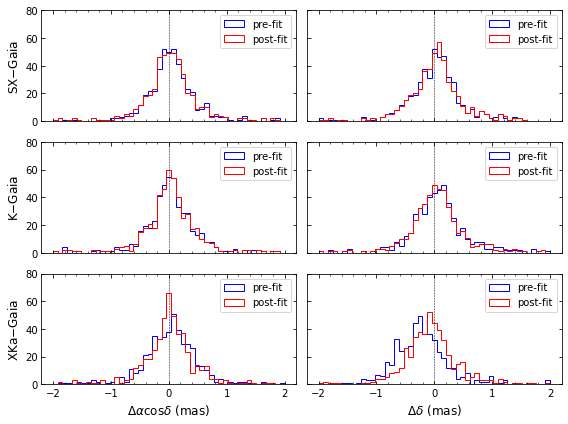

In [6]:
# Histogram of dra and ddec
fig, ((ax0, ax1),
      (ax2, ax3), (ax4, ax5)) = plt.subplots(
    figsize=(8, 6), ncols=2, nrows=3, sharex=True, sharey=True)

# n_bins = 25
bins_set = np.linspace(-2, 2, 50)

# Weights to calculate the per cent
wgt = 100 / len(comsou) * np.ones_like(comsou["ra"])

# Plot
# R.A. difference (original)
# SX - Gaia
ax0.hist(comsou["dra_sx"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")

# K - Gaia
ax2.hist(comsou["dra_k"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")

# XKa - Gaia
ax4.hist(comsou["dra_ka"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")

# Decl. difference (original)
# SX - Gaia
ax1.hist(comsou["ddec_sx"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")

# K - Gaia
ax3.hist(comsou["ddec_k"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")

# XKa - Gaia
ax5.hist(comsou["ddec_ka"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")

# R.A. difference (adjusted by vsh02, common clean sources)
# SX - Gaia
ax0.hist(comsou["dra_sx_ccl2"], bins_set, histtype="step",
         fill=False, color="r", label="post-fit")

# K - Gaia
ax2.hist(comsou["dra_k_ccl2"], bins_set, histtype="step",
         fill=False, color="r", label="post-fit")

# XKa - Gaia
ax4.hist(comsou["dra_ka_ccl2"], bins_set, histtype="step",
         fill=False, color="r", label="post-fit")

# Decl. difference (adjusted by vsh02, common clean sources)
# SX - Gaia
ax1.hist(comsou["ddec_sx_ccl2"], bins_set, histtype="step",
         fill=False, color="r", label="post-fit")

# K - Gaia
ax3.hist(comsou["ddec_k_ccl2"], bins_set, histtype="step",
         fill=False, color="r", label="post-fit")

# XKa - Gaia
ax5.hist(comsou["ddec_ka_ccl2"], bins_set, histtype="step",
         fill=False, color="r", label="post-fit")

ymin, ymax = 0, 80
ax0.set_ylim([ymin, ymax])

# Vetical lines
ax0.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")
ax1.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")
ax2.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")
ax3.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")
ax4.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")
ax5.vlines(0, ymin, ymax, "k", lw=0.5, ls="dashed")

ax0.set_ylabel("SX$-$Gaia", fontsize=12)
ax2.set_ylabel("K$-$Gaia", fontsize=12)
ax4.set_ylabel("XKa$-$Gaia", fontsize=12)

ax4.set_xlabel("$\Delta\\alpha\cos\delta$ (mas)", fontsize=12)
ax5.set_xlabel("$\Delta\delta$ (mas)", fontsize=12)
ax5.xaxis.set_minor_locator(MultipleLocator(0.2))

ax0.legend()
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

plt.tight_layout()

In general, the adjustment of 16-parameters from all sources seems to remove the bias in $\Delta\alpha^*$ and $\delta$.

# 2. On the angular separation

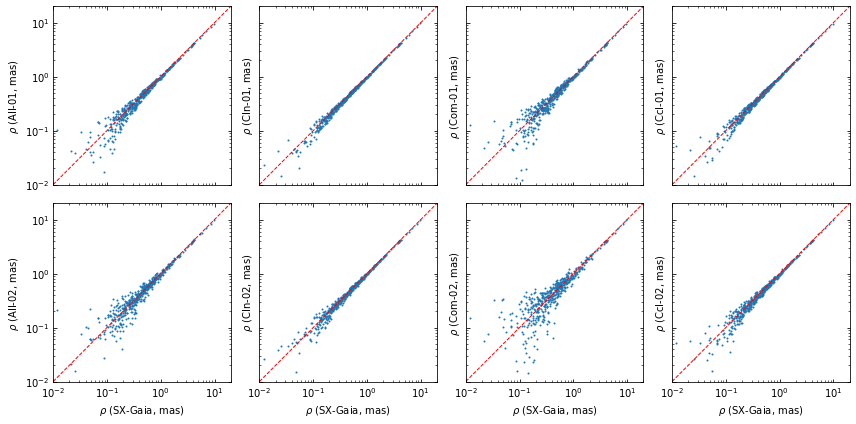

In [7]:
# Offset of SX-Gaia (original vs. adjusted by vsh01 vs. adjusted by vsh02)
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(
    figsize=(12, 6), nrows=2, ncols=4, sharex=True, sharey=True)

ax0.plot(comsou["ang_sep_sx"], comsou["ang_sep_sx_all1"], ".", ms=2)
ax4.plot(comsou["ang_sep_sx"], comsou["ang_sep_sx_all2"], ".", ms=2)
ax1.plot(comsou["ang_sep_sx"], comsou["ang_sep_sx_cln1"], ".", ms=2)
ax5.plot(comsou["ang_sep_sx"], comsou["ang_sep_sx_cln2"], ".", ms=2)
ax2.plot(comsou["ang_sep_sx"], comsou["ang_sep_sx_com1"], ".", ms=2)
ax6.plot(comsou["ang_sep_sx"], comsou["ang_sep_sx_com2"], ".", ms=2)
ax3.plot(comsou["ang_sep_sx"], comsou["ang_sep_sx_ccl1"], ".", ms=2)
ax7.plot(comsou["ang_sep_sx"], comsou["ang_sep_sx_ccl2"], ".", ms=2)

ax0.set_xscale("log")
ax0.set_yscale("log")

ax0.axis([0.01, 20, 0.01, 20])
ax4.set_xlabel("$\\rho$ (SX-Gaia, mas)")
ax5.set_xlabel("$\\rho$ (SX-Gaia, mas)")
ax6.set_xlabel("$\\rho$ (SX-Gaia, mas)")
ax7.set_xlabel("$\\rho$ (SX-Gaia, mas)")

ax0.set_ylabel("$\\rho$ (All-01, mas)")
ax4.set_ylabel("$\\rho$ (All-02, mas)")
ax1.set_ylabel("$\\rho$ (Cln-01, mas)")
ax5.set_ylabel("$\\rho$ (Cln-02, mas)")
ax2.set_ylabel("$\\rho$ (Com-01, mas)")
ax6.set_ylabel("$\\rho$ (Com-02, mas)")
ax3.set_ylabel("$\\rho$ (Ccl-01, mas)")
ax7.set_ylabel("$\\rho$ (Ccl-02, mas)")

# Draw a line of y = x
x = 10**np.arange(-2, 2, 0.1)
ax0.plot(x, x, "r--", lw=1)
ax1.plot(x, x, "r--", lw=1)
ax2.plot(x, x, "r--", lw=1)
ax3.plot(x, x, "r--", lw=1)
ax4.plot(x, x, "r--", lw=1)
ax5.plot(x, x, "r--", lw=1)
ax6.plot(x, x, "r--", lw=1)
ax7.plot(x, x, "r--", lw=1)

plt.tight_layout()

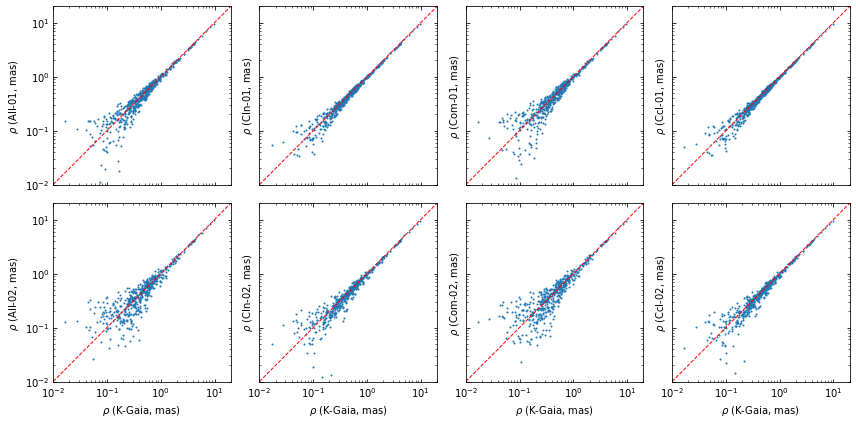

In [8]:
# Offset of K-Gaia (original vs. adjusted by vsh01 vs. adjusted by vsh02)
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(
    figsize=(12, 6), nrows=2, ncols=4, sharex=True, sharey=True)

ax0.plot(comsou["ang_sep_k"], comsou["ang_sep_k_all1"], ".", ms=2)
ax4.plot(comsou["ang_sep_k"], comsou["ang_sep_k_all2"], ".", ms=2)
ax1.plot(comsou["ang_sep_k"], comsou["ang_sep_k_cln1"], ".", ms=2)
ax5.plot(comsou["ang_sep_k"], comsou["ang_sep_k_cln2"], ".", ms=2)
ax2.plot(comsou["ang_sep_k"], comsou["ang_sep_k_com1"], ".", ms=2)
ax6.plot(comsou["ang_sep_k"], comsou["ang_sep_k_com2"], ".", ms=2)
ax3.plot(comsou["ang_sep_k"], comsou["ang_sep_k_ccl1"], ".", ms=2)
ax7.plot(comsou["ang_sep_k"], comsou["ang_sep_k_ccl2"], ".", ms=2)

ax0.set_xscale("log")
ax0.set_yscale("log")

ax0.axis([0.01, 20, 0.01, 20])
ax4.set_xlabel("$\\rho$ (K-Gaia, mas)")
ax5.set_xlabel("$\\rho$ (K-Gaia, mas)")
ax6.set_xlabel("$\\rho$ (K-Gaia, mas)")
ax7.set_xlabel("$\\rho$ (K-Gaia, mas)")

ax0.set_ylabel("$\\rho$ (All-01, mas)")
ax4.set_ylabel("$\\rho$ (All-02, mas)")
ax1.set_ylabel("$\\rho$ (Cln-01, mas)")
ax5.set_ylabel("$\\rho$ (Cln-02, mas)")
ax2.set_ylabel("$\\rho$ (Com-01, mas)")
ax6.set_ylabel("$\\rho$ (Com-02, mas)")
ax3.set_ylabel("$\\rho$ (Ccl-01, mas)")
ax7.set_ylabel("$\\rho$ (Ccl-02, mas)")

# Draw a line of y = x
x = 10**np.arange(-2, 2, 0.1)
ax0.plot(x, x, "r--", lw=1)
ax1.plot(x, x, "r--", lw=1)
ax2.plot(x, x, "r--", lw=1)
ax3.plot(x, x, "r--", lw=1)
ax4.plot(x, x, "r--", lw=1)
ax5.plot(x, x, "r--", lw=1)
ax6.plot(x, x, "r--", lw=1)
ax7.plot(x, x, "r--", lw=1)

plt.tight_layout()

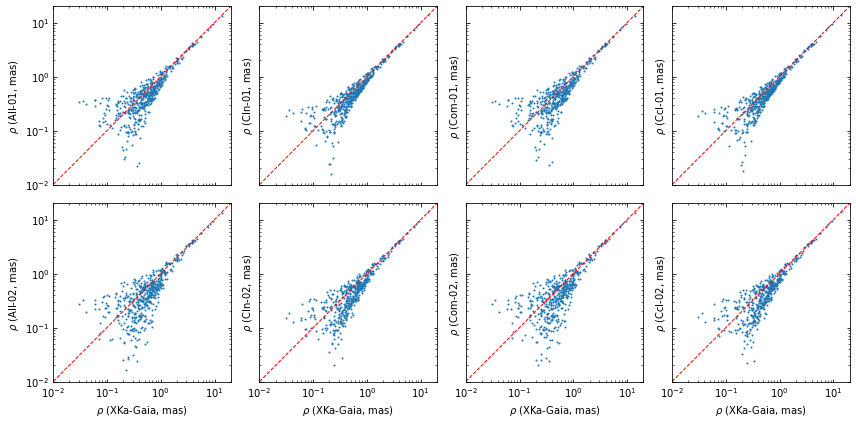

In [9]:
# Offset of XKa-Gaia (original vs. adjusted by vsh01 vs. adjusted by vsh02)
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(
    figsize=(12, 6), nrows=2, ncols=4, sharex=True, sharey=True)

ax0.plot(comsou["ang_sep_ka"], comsou["ang_sep_ka_all1"], ".", ms=2)
ax4.plot(comsou["ang_sep_ka"], comsou["ang_sep_ka_all2"], ".", ms=2)
ax1.plot(comsou["ang_sep_ka"], comsou["ang_sep_ka_cln1"], ".", ms=2)
ax5.plot(comsou["ang_sep_ka"], comsou["ang_sep_ka_cln2"], ".", ms=2)
ax2.plot(comsou["ang_sep_ka"], comsou["ang_sep_ka_com1"], ".", ms=2)
ax6.plot(comsou["ang_sep_ka"], comsou["ang_sep_ka_com2"], ".", ms=2)
ax3.plot(comsou["ang_sep_ka"], comsou["ang_sep_ka_ccl1"], ".", ms=2)
ax7.plot(comsou["ang_sep_ka"], comsou["ang_sep_ka_ccl2"], ".", ms=2)

ax0.set_xscale("log")
ax0.set_yscale("log")

ax0.axis([0.01, 20, 0.01, 20])
ax4.set_xlabel("$\\rho$ (XKa-Gaia, mas)")
ax5.set_xlabel("$\\rho$ (XKa-Gaia, mas)")
ax6.set_xlabel("$\\rho$ (XKa-Gaia, mas)")
ax7.set_xlabel("$\\rho$ (XKa-Gaia, mas)")

ax0.set_ylabel("$\\rho$ (All-01, mas)")
ax4.set_ylabel("$\\rho$ (All-02, mas)")
ax1.set_ylabel("$\\rho$ (Cln-01, mas)")
ax5.set_ylabel("$\\rho$ (Cln-02, mas)")
ax2.set_ylabel("$\\rho$ (Com-01, mas)")
ax6.set_ylabel("$\\rho$ (Com-02, mas)")
ax3.set_ylabel("$\\rho$ (Ccl-01, mas)")
ax7.set_ylabel("$\\rho$ (Ccl-02, mas)")

# Draw a line of y = x
x = 10**np.arange(-2, 2, 0.1)
ax0.plot(x, x, "r--", lw=1)
ax1.plot(x, x, "r--", lw=1)
ax2.plot(x, x, "r--", lw=1)
ax3.plot(x, x, "r--", lw=1)
ax4.plot(x, x, "r--", lw=1)
ax5.plot(x, x, "r--", lw=1)
ax6.plot(x, x, "r--", lw=1)
ax7.plot(x, x, "r--", lw=1)

plt.tight_layout()

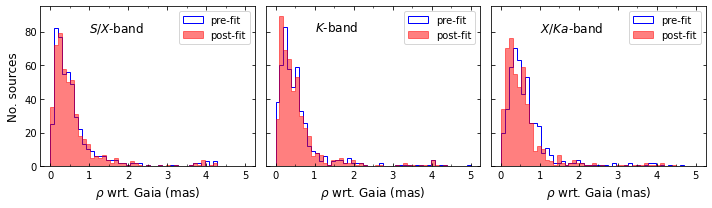

In [10]:
# Histogram of normalized separation
fig, (ax0, ax1, ax2) = plt.subplots(
    figsize=(10, 3), ncols=3, sharex=True, sharey=True)

bins_set = np.linspace(0, 5, 50)

# Plot
# SX - Gaia
ax0.hist(comsou["ang_sep_sx"], bins_set,
         histtype="step", color="b",
         label="pre-fit")
ax0.hist(comsou["ang_sep_sx_ccl2"], bins_set,
         histtype="step", color="r",
         fill=True, alpha=0.5,
         label="post-fit")

# K - Gaia
ax1.hist(comsou["ang_sep_k"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")
ax1.hist(comsou["ang_sep_k_ccl2"], bins_set,
         histtype="step", color="r",
         fill=True, alpha=0.5,
         label="post-fit")

# XKa - Gaia
ax2.hist(comsou["ang_sep_ka"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")
ax2.hist(comsou["ang_sep_ka_ccl2"], bins_set,
         histtype="step", color="r",
         fill=True, alpha=0.5,
         label="post-fit")

ylim = 95
ax0.set_ylim([0, ylim])

ax0.set_ylabel("No. sources", fontsize=12)
# ax1.set_ylabel("No. sources", fontsize=12)
# ax2.set_ylabel("No. sources", fontsize=12)

posx, posy = 1, 80

ax0.text(posx, posy, "$S/X$-band", fontsize=12)
ax1.text(posx, posy, "$K$-band", fontsize=12)
ax2.text(posx, posy, "$X/Ka$-band", fontsize=12)

ax0.set_xlabel("$\\rho$ wrt. Gaia (mas)", fontsize=12)
ax1.set_xlabel("$\\rho$ wrt. Gaia (mas)", fontsize=12)
ax2.set_xlabel("$\\rho$ wrt. Gaia (mas)", fontsize=12)
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))

ax0.legend()
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

Text(0, 0.5, '$\\rho$ wrt. Gaia (mas)')

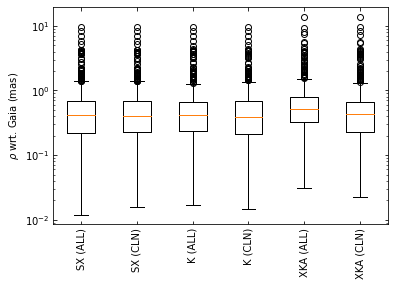

In [11]:
fig, ax = plt.subplots()

ax.boxplot([comsou["ang_sep_sx"], comsou["ang_sep_sx_ccl2"],
            comsou["ang_sep_k"], comsou["ang_sep_k_ccl2"],
            comsou["ang_sep_ka"], comsou["ang_sep_ka_ccl2"]])
#            showfliers=False)

ax.set_yscale("log")

ax.set_xticks(np.arange(1, 7))
ax.set_xticklabels(["SX (ALL)", "SX (CLN)", "K (ALL)",
                    "K (CLN)", "XKA (ALL)", "XKA (CLN)"], rotation="vertical")

ax.set_ylabel("$\\rho$ wrt. Gaia (mas)")

Different to the result that modeling of VSH parameters reduce the angular separation between SX and XKa band position, the Gaia-Ka distance is not affected significantly.
However, compared with the S/X- and K-band cases, the X/Ka-band position is still affect the most by the large-scale differences wrt. Gaia.

# 3. On normalized separation

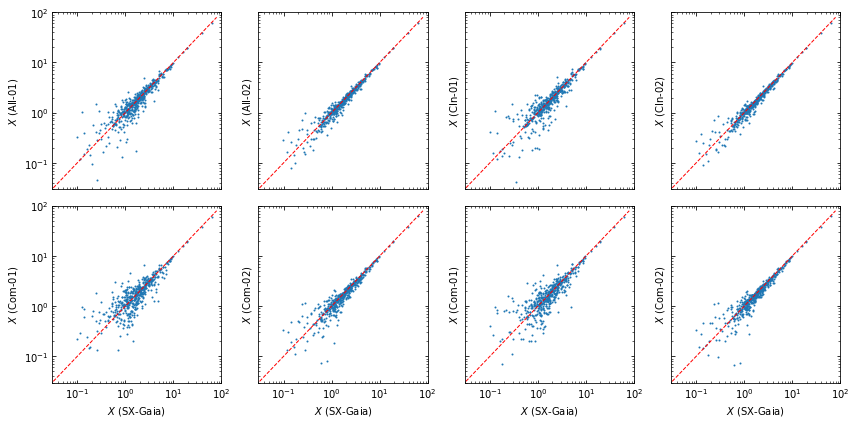

In [12]:
# Offset of SX-Gaia (original vs. adjusted by vsh01 vs. adjusted by vsh02)
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(
    figsize=(12, 6), nrows=2, ncols=4, sharex=True, sharey=True)

ax0.plot(comsou["nor_sep_k"], comsou["nor_sep_k_all1"], ".", ms=2)
ax4.plot(comsou["nor_sep_k"], comsou["nor_sep_k_all2"], ".", ms=2)
ax1.plot(comsou["nor_sep_k"], comsou["nor_sep_k_cln1"], ".", ms=2)
ax5.plot(comsou["nor_sep_k"], comsou["nor_sep_k_cln2"], ".", ms=2)
ax2.plot(comsou["nor_sep_k"], comsou["nor_sep_k_com1"], ".", ms=2)
ax6.plot(comsou["nor_sep_k"], comsou["nor_sep_k_com2"], ".", ms=2)
ax3.plot(comsou["nor_sep_k"], comsou["nor_sep_k_ccl1"], ".", ms=2)
ax7.plot(comsou["nor_sep_k"], comsou["nor_sep_k_ccl2"], ".", ms=2)

ax0.set_xscale("log")
ax0.set_yscale("log")

ax4.set_xlabel("$X$ (SX-Gaia)")
ax5.set_xlabel("$X$ (SX-Gaia)")
ax6.set_xlabel("$X$ (SX-Gaia)")
ax7.set_xlabel("$X$ (SX-Gaia)")

ax0.set_ylabel("$X$ (All-01)")
ax1.set_ylabel("$X$ (All-02)")
ax2.set_ylabel("$X$ (Cln-01)")
ax3.set_ylabel("$X$ (Cln-02)")
ax4.set_ylabel("$X$ (Com-01)")
ax5.set_ylabel("$X$ (Com-02)")
ax6.set_ylabel("$X$ (Com-01)")
ax7.set_ylabel("$X$ (Com-02)")

ax0.axis([0.03, 100, 0.03, 100])
# Draw a line of y = x
x = 10**np.arange(-1.5, 2, 0.1)
ax0.plot(x, x, "r--", lw=1)
ax1.plot(x, x, "r--", lw=1)
ax2.plot(x, x, "r--", lw=1)
ax3.plot(x, x, "r--", lw=1)
ax4.plot(x, x, "r--", lw=1)
ax5.plot(x, x, "r--", lw=1)
ax6.plot(x, x, "r--", lw=1)
ax7.plot(x, x, "r--", lw=1)

plt.tight_layout()

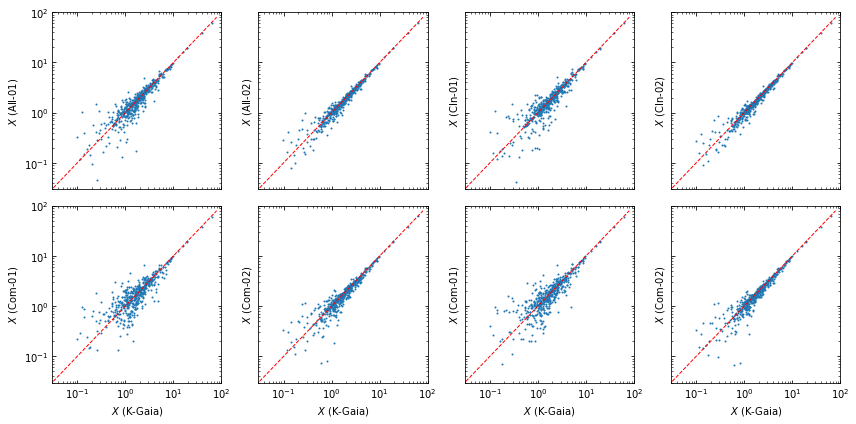

In [13]:
# Offset of K-Gaia (original vs. adjusted by vsh01 vs. adjusted by vsh02)
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(
    figsize=(12, 6), nrows=2, ncols=4, sharex=True, sharey=True)

ax0.plot(comsou["nor_sep_k"], comsou["nor_sep_k_all1"], ".", ms=2)
ax4.plot(comsou["nor_sep_k"], comsou["nor_sep_k_all2"], ".", ms=2)
ax1.plot(comsou["nor_sep_k"], comsou["nor_sep_k_cln1"], ".", ms=2)
ax5.plot(comsou["nor_sep_k"], comsou["nor_sep_k_cln2"], ".", ms=2)
ax2.plot(comsou["nor_sep_k"], comsou["nor_sep_k_com1"], ".", ms=2)
ax6.plot(comsou["nor_sep_k"], comsou["nor_sep_k_com2"], ".", ms=2)
ax3.plot(comsou["nor_sep_k"], comsou["nor_sep_k_ccl1"], ".", ms=2)
ax7.plot(comsou["nor_sep_k"], comsou["nor_sep_k_ccl2"], ".", ms=2)

ax0.set_xscale("log")
ax0.set_yscale("log")

ax4.set_xlabel("$X$ (K-Gaia)")
ax5.set_xlabel("$X$ (K-Gaia)")
ax6.set_xlabel("$X$ (K-Gaia)")
ax7.set_xlabel("$X$ (K-Gaia)")

ax0.set_ylabel("$X$ (All-01)")
ax1.set_ylabel("$X$ (All-02)")
ax2.set_ylabel("$X$ (Cln-01)")
ax3.set_ylabel("$X$ (Cln-02)")
ax4.set_ylabel("$X$ (Com-01)")
ax5.set_ylabel("$X$ (Com-02)")
ax6.set_ylabel("$X$ (Com-01)")
ax7.set_ylabel("$X$ (Com-02)")

ax0.axis([0.03, 100, 0.03, 100])
# Draw a line of y = x
x = 10**np.arange(-1.5, 2, 0.1)
ax0.plot(x, x, "r--", lw=1)
ax1.plot(x, x, "r--", lw=1)
ax2.plot(x, x, "r--", lw=1)
ax3.plot(x, x, "r--", lw=1)
ax4.plot(x, x, "r--", lw=1)
ax5.plot(x, x, "r--", lw=1)
ax6.plot(x, x, "r--", lw=1)
ax7.plot(x, x, "r--", lw=1)

plt.tight_layout()

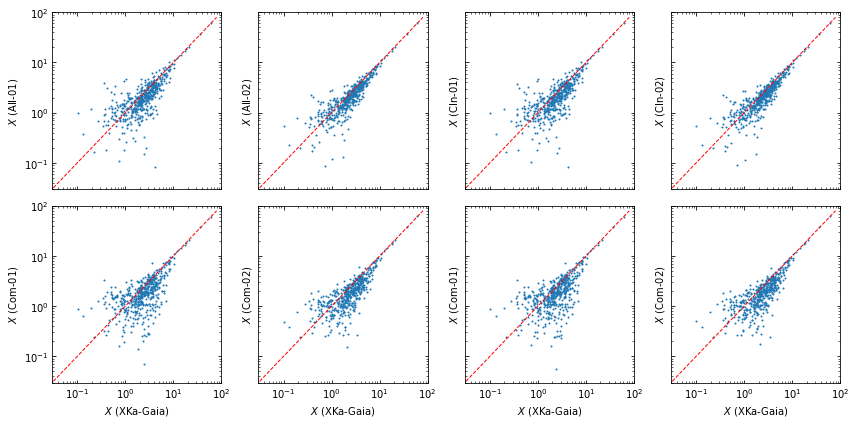

In [14]:
# Offset of XKa-Gaia (original vs. adjusted by vsh01 vs. adjusted by vsh02)
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(
    figsize=(12, 6), nrows=2, ncols=4, sharex=True, sharey=True)

ax0.plot(comsou["nor_sep_ka"], comsou["nor_sep_ka_all1"], ".", ms=2)
ax4.plot(comsou["nor_sep_ka"], comsou["nor_sep_ka_all2"], ".", ms=2)
ax1.plot(comsou["nor_sep_ka"], comsou["nor_sep_ka_cln1"], ".", ms=2)
ax5.plot(comsou["nor_sep_ka"], comsou["nor_sep_ka_cln2"], ".", ms=2)
ax2.plot(comsou["nor_sep_ka"], comsou["nor_sep_ka_com1"], ".", ms=2)
ax6.plot(comsou["nor_sep_ka"], comsou["nor_sep_ka_com2"], ".", ms=2)
ax3.plot(comsou["nor_sep_ka"], comsou["nor_sep_ka_ccl1"], ".", ms=2)
ax7.plot(comsou["nor_sep_ka"], comsou["nor_sep_ka_ccl2"], ".", ms=2)

ax0.set_xscale("log")
ax0.set_yscale("log")

ax4.set_xlabel("$X$ (XKa-Gaia)")
ax5.set_xlabel("$X$ (XKa-Gaia)")
ax6.set_xlabel("$X$ (XKa-Gaia)")
ax7.set_xlabel("$X$ (XKa-Gaia)")

ax0.set_ylabel("$X$ (All-01)")
ax1.set_ylabel("$X$ (All-02)")
ax2.set_ylabel("$X$ (Cln-01)")
ax3.set_ylabel("$X$ (Cln-02)")
ax4.set_ylabel("$X$ (Com-01)")
ax5.set_ylabel("$X$ (Com-02)")
ax6.set_ylabel("$X$ (Com-01)")
ax7.set_ylabel("$X$ (Com-02)")

ax0.axis([0.03, 100, 0.03, 100])
# Draw a line of y = x
x = 10**np.arange(-1.5, 2, 0.1)
ax0.plot(x, x, "r--", lw=1)
ax1.plot(x, x, "r--", lw=1)
ax2.plot(x, x, "r--", lw=1)
ax3.plot(x, x, "r--", lw=1)
ax4.plot(x, x, "r--", lw=1)
ax5.plot(x, x, "r--", lw=1)
ax6.plot(x, x, "r--", lw=1)
ax7.plot(x, x, "r--", lw=1)

plt.tight_layout()

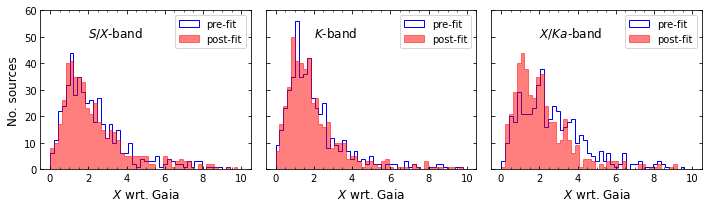

In [15]:
# Histogram of normalized separation
fig, (ax0, ax1, ax2) = plt.subplots(
    figsize=(10, 3), ncols=3, sharex=True, sharey=True)

bins_set = np.linspace(0, 10, 50)

# Plot
# SX - Gaia
ax0.hist(comsou["nor_sep_sx"], bins_set,
         histtype="step", color="b",
         label="pre-fit")
ax0.hist(comsou["nor_sep_sx_ccl2"], bins_set,
         histtype="step", color="r",
         fill=True, alpha=0.5,
         label="post-fit")

# K - Gaia
ax1.hist(comsou["nor_sep_k"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")
ax1.hist(comsou["nor_sep_k_ccl2"], bins_set,
         histtype="step", color="r",
         fill=True, alpha=0.5,
         label="post-fit")

# XKa - Gaia
ax2.hist(comsou["nor_sep_ka"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")
ax2.hist(comsou["nor_sep_ka_ccl2"], bins_set,
         histtype="step", color="r",
         fill=True, alpha=0.5,
         label="post-fit")

ylim = 60
ax0.set_ylim([0, ylim])

ax0.set_ylabel("No. sources", fontsize=12)
# ax1.set_ylabel("No. sources", fontsize=12)
# ax2.set_ylabel("No. sources", fontsize=12)

posx, posy = 2, 50

ax0.text(posx, posy, "$S/X$-band", fontsize=12)
ax1.text(posx, posy, "$K$-band", fontsize=12)
ax2.text(posx, posy, "$X/Ka$-band", fontsize=12)

ax0.set_xlabel("$X$ wrt. Gaia", fontsize=12)
ax1.set_xlabel("$X$ wrt. Gaia", fontsize=12)
ax2.set_xlabel("$X$ wrt. Gaia", fontsize=12)
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))

ax0.legend()
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

Text(0, 0.5, '$X$ wrt. Gaia')

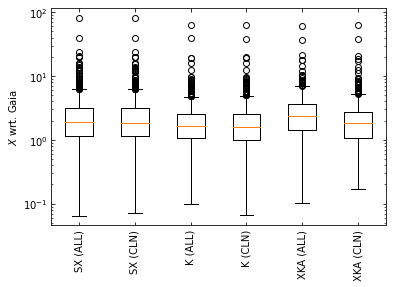

In [16]:
fig, ax = plt.subplots()

ax.boxplot([comsou["nor_sep_sx"], comsou["nor_sep_sx_ccl2"],
            comsou["nor_sep_k"], comsou["nor_sep_k_ccl2"],
            comsou["nor_sep_ka"], comsou["nor_sep_ka_ccl2"]])
#            showfliers=False)

ax.set_yscale("log")

ax.set_xticks(np.arange(1, 7))
ax.set_xticklabels(["SX (ALL)", "SX (CLN)", "K (ALL)",
                    "K (CLN)", "XKA (ALL)", "XKA (CLN)"], rotation="vertical")

ax.set_ylabel("$X$ wrt. Gaia")

Modeling of VSH parameters reduce the normalized separation between Gaia and XKa band position.

# 4. On the positional offset direction

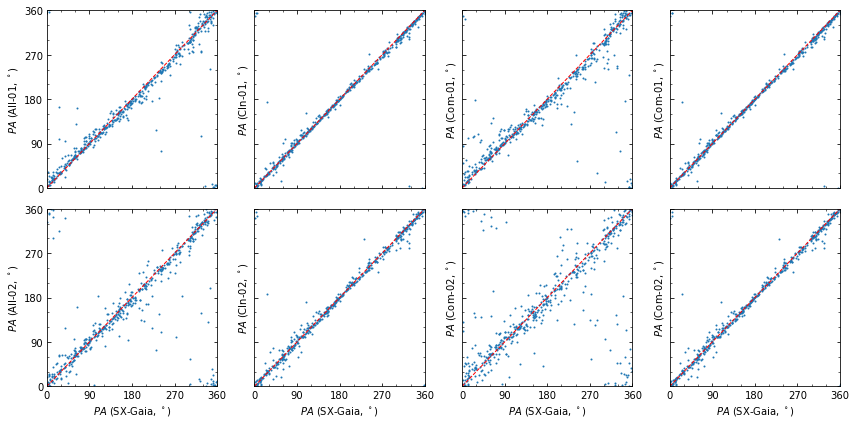

In [17]:
# The positional angle difference of SX-Gaia (original vs. adjusted by vsh01 vs. adjusted by vsh02)
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(
    figsize=(12, 6), nrows=2, ncols=4, sharex=True, sharey=True)

ax0.plot(comsou["pa_sx"], comsou["pa_sx_all1"], ".", ms=2)
ax4.plot(comsou["pa_sx"], comsou["pa_sx_all2"], ".", ms=2)
ax1.plot(comsou["pa_sx"], comsou["pa_sx_cln1"], ".", ms=2)
ax5.plot(comsou["pa_sx"], comsou["pa_sx_cln2"], ".", ms=2)
ax2.plot(comsou["pa_sx"], comsou["pa_sx_com1"], ".", ms=2)
ax6.plot(comsou["pa_sx"], comsou["pa_sx_com2"], ".", ms=2)
ax3.plot(comsou["pa_sx"], comsou["pa_sx_cln1"], ".", ms=2)
ax7.plot(comsou["pa_sx"], comsou["pa_sx_cln2"], ".", ms=2)

ax4.set_xlabel("$PA$ (SX-Gaia, $^\circ$)")
ax5.set_xlabel("$PA$ (SX-Gaia, $^\circ$)")
ax6.set_xlabel("$PA$ (SX-Gaia, $^\circ$)")
ax7.set_xlabel("$PA$ (SX-Gaia, $^\circ$)")

ax0.set_ylabel("$PA$ (All-01, $^\circ$)")
ax4.set_ylabel("$PA$ (All-02, $^\circ$)")
ax1.set_ylabel("$PA$ (Cln-01, $^\circ$)")
ax5.set_ylabel("$PA$ (Cln-02, $^\circ$)")
ax2.set_ylabel("$PA$ (Com-01, $^\circ$)")
ax6.set_ylabel("$PA$ (Com-02, $^\circ$)")
ax3.set_ylabel("$PA$ (Com-01, $^\circ$)")
ax7.set_ylabel("$PA$ (Com-02, $^\circ$)")

ax0.axis([0, 360, 0, 360])
ax0.xaxis.set_minor_locator(MultipleLocator(30))
ax0.yaxis.set_minor_locator(MultipleLocator(30))
ax0.set_xticks(np.arange(0, 361, 90))
ax0.set_yticks(np.arange(0, 361, 90))

# Draw a line of y = x
x = np.arange(360)
ax0.plot(x, x, "r--", lw=1)
ax1.plot(x, x, "r--", lw=1)
ax2.plot(x, x, "r--", lw=1)
ax3.plot(x, x, "r--", lw=1)
ax4.plot(x, x, "r--", lw=1)
ax5.plot(x, x, "r--", lw=1)
ax6.plot(x, x, "r--", lw=1)
ax7.plot(x, x, "r--", lw=1)

plt.tight_layout()

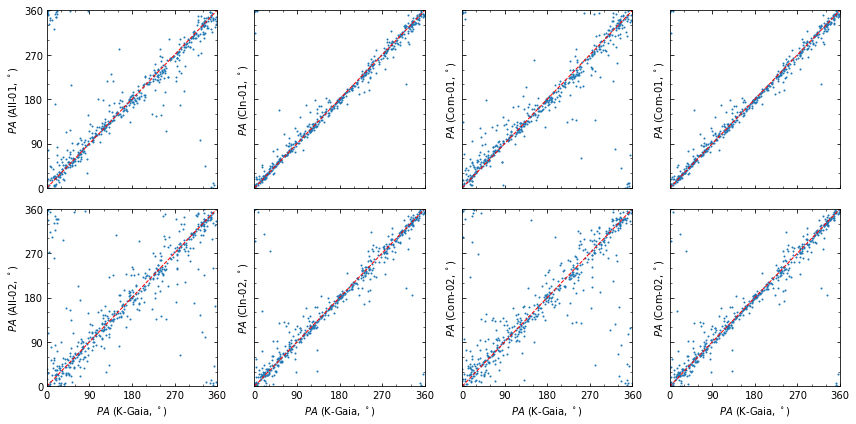

In [18]:
# The positional angle difference of K-Gaia (original vs. adjusted by vsh01 vs. adjusted by vsh02)
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(
    figsize=(12, 6), nrows=2, ncols=4, sharex=True, sharey=True)

ax0.plot(comsou["pa_k"], comsou["pa_k_all1"], ".", ms=2)
ax4.plot(comsou["pa_k"], comsou["pa_k_all2"], ".", ms=2)
ax1.plot(comsou["pa_k"], comsou["pa_k_cln1"], ".", ms=2)
ax5.plot(comsou["pa_k"], comsou["pa_k_cln2"], ".", ms=2)
ax2.plot(comsou["pa_k"], comsou["pa_k_com1"], ".", ms=2)
ax6.plot(comsou["pa_k"], comsou["pa_k_com2"], ".", ms=2)
ax3.plot(comsou["pa_k"], comsou["pa_k_cln1"], ".", ms=2)
ax7.plot(comsou["pa_k"], comsou["pa_k_cln2"], ".", ms=2)

ax4.set_xlabel("$PA$ (K-Gaia, $^\circ$)")
ax5.set_xlabel("$PA$ (K-Gaia, $^\circ$)")
ax6.set_xlabel("$PA$ (K-Gaia, $^\circ$)")
ax7.set_xlabel("$PA$ (K-Gaia, $^\circ$)")

ax0.set_ylabel("$PA$ (All-01, $^\circ$)")
ax4.set_ylabel("$PA$ (All-02, $^\circ$)")
ax1.set_ylabel("$PA$ (Cln-01, $^\circ$)")
ax5.set_ylabel("$PA$ (Cln-02, $^\circ$)")
ax2.set_ylabel("$PA$ (Com-01, $^\circ$)")
ax6.set_ylabel("$PA$ (Com-02, $^\circ$)")
ax3.set_ylabel("$PA$ (Com-01, $^\circ$)")
ax7.set_ylabel("$PA$ (Com-02, $^\circ$)")

ax0.axis([0, 360, 0, 360])
ax0.xaxis.set_minor_locator(MultipleLocator(30))
ax0.yaxis.set_minor_locator(MultipleLocator(30))
ax0.set_xticks(np.arange(0, 361, 90))
ax0.set_yticks(np.arange(0, 361, 90))

# Draw a line of y = x
x = np.arange(360)
ax0.plot(x, x, "r--", lw=1)
ax1.plot(x, x, "r--", lw=1)
ax2.plot(x, x, "r--", lw=1)
ax3.plot(x, x, "r--", lw=1)
ax4.plot(x, x, "r--", lw=1)
ax5.plot(x, x, "r--", lw=1)
ax6.plot(x, x, "r--", lw=1)
ax7.plot(x, x, "r--", lw=1)

plt.tight_layout()

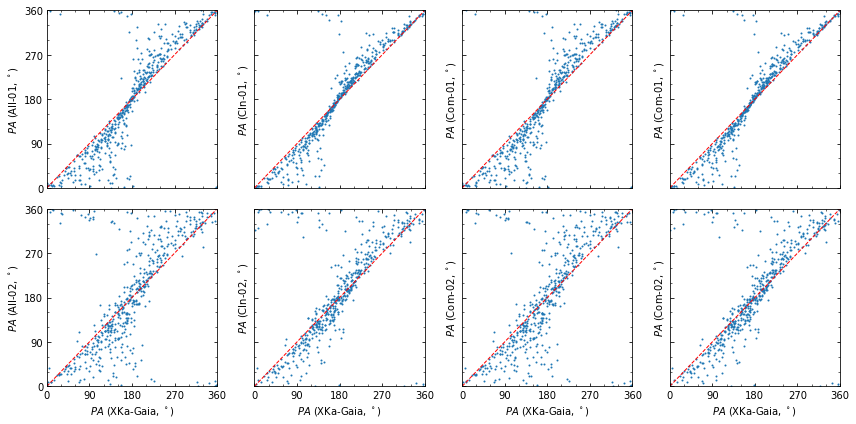

In [19]:
# The positional angle difference of Ka-Gaia (original vs. adjusted by vsh01 vs. adjusted by vsh02)
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(
    figsize=(12, 6), nrows=2, ncols=4, sharex=True, sharey=True)

ax0.plot(comsou["pa_ka"], comsou["pa_ka_all1"], ".", ms=2)
ax4.plot(comsou["pa_ka"], comsou["pa_ka_all2"], ".", ms=2)
ax1.plot(comsou["pa_ka"], comsou["pa_ka_cln1"], ".", ms=2)
ax5.plot(comsou["pa_ka"], comsou["pa_ka_cln2"], ".", ms=2)
ax2.plot(comsou["pa_ka"], comsou["pa_ka_com1"], ".", ms=2)
ax6.plot(comsou["pa_ka"], comsou["pa_ka_com2"], ".", ms=2)
ax3.plot(comsou["pa_ka"], comsou["pa_ka_cln1"], ".", ms=2)
ax7.plot(comsou["pa_ka"], comsou["pa_ka_cln2"], ".", ms=2)

ax4.set_xlabel("$PA$ (XKa-Gaia, $^\circ$)")
ax5.set_xlabel("$PA$ (XKa-Gaia, $^\circ$)")
ax6.set_xlabel("$PA$ (XKa-Gaia, $^\circ$)")
ax7.set_xlabel("$PA$ (XKa-Gaia, $^\circ$)")

ax0.set_ylabel("$PA$ (All-01, $^\circ$)")
ax4.set_ylabel("$PA$ (All-02, $^\circ$)")
ax1.set_ylabel("$PA$ (Cln-01, $^\circ$)")
ax5.set_ylabel("$PA$ (Cln-02, $^\circ$)")
ax2.set_ylabel("$PA$ (Com-01, $^\circ$)")
ax6.set_ylabel("$PA$ (Com-02, $^\circ$)")
ax3.set_ylabel("$PA$ (Com-01, $^\circ$)")
ax7.set_ylabel("$PA$ (Com-02, $^\circ$)")

ax0.axis([0, 360, 0, 360])
ax0.xaxis.set_minor_locator(MultipleLocator(30))
ax0.yaxis.set_minor_locator(MultipleLocator(30))
ax0.set_xticks(np.arange(0, 361, 90))
ax0.set_yticks(np.arange(0, 361, 90))

# Draw a line of y = x
x = np.arange(360)
ax0.plot(x, x, "r--", lw=1)
ax1.plot(x, x, "r--", lw=1)
ax2.plot(x, x, "r--", lw=1)
ax3.plot(x, x, "r--", lw=1)
ax4.plot(x, x, "r--", lw=1)
ax5.plot(x, x, "r--", lw=1)
ax6.plot(x, x, "r--", lw=1)
ax7.plot(x, x, "r--", lw=1)

plt.tight_layout()

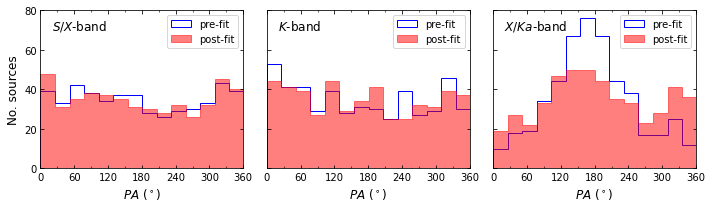

In [20]:
# Histogram of normalized separation
fig, (ax0, ax1, ax2) = plt.subplots(
    figsize=(10, 3), ncols=3, sharex=True, sharey=True)

bins_set = np.linspace(0, 361, 15)

# Plot
# SX - Gaia
ax0.hist(comsou["pa_sx"], bins_set,
         histtype="step", color="b",
         label="pre-fit")
ax0.hist(comsou["pa_sx_ccl2"], bins_set,
         histtype="step", color="lightgrey",
         fill=True, label="post-fit")

# K - Gaia
ax1.hist(comsou["pa_k"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")
ax1.hist(comsou["pa_k_ccl2"], bins_set,
         histtype="step", color="lightgrey",
         fill=True, label="post-fit")

# XKa - Gaia
ax2.hist(comsou["pa_ka"], bins_set, histtype="step",
         fill=False, color="b", label="pre-fit")
ax2.hist(comsou["pa_ka_ccl2"], bins_set,
         histtype="step", color="lightgrey",
         fill=True, label="post-fit")

ylim = 80
ax0.set_ylim([0, ylim])
ax0.set_xlim([0, 360])
ax0.set_xticks(np.arange(0, 361, 60))
ax0.xaxis.set_minor_locator(MultipleLocator(30))

ax0.set_ylabel("No. sources", fontsize=12)
# ax1.set_ylabel("No. sources", fontsize=12)
# ax2.set_ylabel("No. sources", fontsize=12)

posx, posy = 20, 70

ax0.text(posx, posy, "$S/X$-band", fontsize=12)
ax1.text(posx, posy, "$K$-band", fontsize=12)
ax2.text(posx, posy, "$X/Ka$-band", fontsize=12)

ax0.set_xlabel("$PA$ ($^\circ$)", fontsize=12)
ax1.set_xlabel("$PA$ ($^\circ$)", fontsize=12)
ax2.set_xlabel("$PA$ ($^\circ$)", fontsize=12)

ax0.legend()
ax1.legend()
ax2.legend()

plt.tight_layout()

# What do we find?

- 1. The adjustment of VSH parameters of degree 2 removes the declination bias 
between Ka-band and Gaia position (as seen from my eyes) while degree 1 fitting deoes not.

- 2. The adjustment of VSH parameters of degree 2 does not remove the angular separation of 
Gaia-Ka position statistically significantly but reduce the normalized separations.

- 3. The adjustment of VSH parameters of degree 2 affect the PA of Gaia-Ka offset.